# 11 Radiation Fluxes in Natural Environments

## Key Components of Solar Radiation

Solar radiation received by an organism comes from three main streams:
1. **Beam (Direct) Radiation**: Radiation coming directly from the sun
2. **Diffuse Radiation**: Radiation scattered by sky and clouds
3. **Reflected Radiation**: Radiation reflected from terrestrial objects

## Types of Radiation Studies

Environmental biophysicists approach radiation studies in two ways:

### 1. Detailed Energy Budget Studies
- Requires detailed observations of radiant flux densities
- Direct measurements needed at time of budget determination
- Used for precise calculations

### 2. Ecosystem Simulation Studies
- Focus on relationships between variables
- Uses models extended from basic principles
- Provides reasonable estimates (±10%)
- Not adequate substitute for field measurements

## Solar Radiation Components

### Beam Radiation (Sb)
- Highly directional
- Follows Lambert's cosine law
- Calculated as: `Sb = Sp cos ψ`
  - Where Sp is perpendicular solar beam flux
  - ψ is solar zenith angle

### Diffuse Sky Radiation (Sd)
- Scattered from all directions
- Computed by integrating radiance of surroundings
- Approximately: `Sd = 0.3(1 - τᵐ)Spo cos ψ`

### Reflected Radiation (Sr)
- Product of surface reflectance (albedo)
- Calculated as: `Sr = ρsSt`
  - Where ρs is shortwave reflectance
  - St is total shortwave irradiance

## Key Parameters for Calculations

### 1. Solar Position Parameters
- **Zenith Angle (ψ)**: Angle from vertical to sun
- **Elevation (β)**: Angle above horizon (β = 90° - ψ)
- **Azimuth Angle (AZ)**: Angle from true north/south in horizontal plane

### 2. Time Parameters
- **Solar Time**: Based on sun position
- **Equation of Time (ET)**: Correction for solar vs. standard time
- **Longitude Correction (LC)**: Adjustment for location within time zone

### 3. Atmospheric Parameters
- **Transmittance (τ)**: Typically 0.6-0.7 for clear sky
- **Air Mass Number (m)**: Ratio of actual path length to vertical path
- **Pressure Correction**: `pa/101.3` for altitude effects

## Important Equations

### Solar Declination
```
sin δ = 0.39785 sin[278.97 + 0.9856J + 1.9165 sin(356.6 + 0.9856J)]
```
Where J is day of year (1-365)

### Solar Noon Time
```
to = 12 - LC - ET
```

### Zenith Angle
```
cos ψ = sin φ sin δ + cos φ cos δ cos[15(t - to)]
```
Where:
- φ is latitude
- δ is solar declination
- t is time
- to is solar noon time

In [ ]:
import numpy as np
from datetime import datetime

def solar_declination(day_of_year):
    """Calculate solar declination angle in degrees.
    
    Args:
        day_of_year (int): Day of year (1-365)
    
    Returns:
        float: Solar declination angle in degrees
    """
    J = day_of_year
    return np.arcsin(0.39785 * np.sin(np.radians(278.97 + 0.9856*J + 
           1.9165 * np.sin(np.radians(356.6 + 0.9856*J))))) * 180/np.pi

def equation_of_time(day_of_year):
    """Calculate equation of time correction in hours.
    
    Args:
        day_of_year (int): Day of year (1-365)
    
    Returns:
        float: Time correction in hours
    """
    f = 279.575 + 0.9856 * day_of_year
    f_rad = np.radians(f)
    
    return (-104.7 * np.sin(f_rad) + 596.2 * np.sin(2*f_rad) + 4.3 * np.sin(3*f_rad) 
            - 12.7 * np.sin(4*f_rad) - 429.3 * np.cos(f_rad) - 2.0 * np.cos(2*f_rad) 
            + 19.3 * np.cos(3*f_rad)) / 3600

def solar_time(hour, minute, longitude, standard_meridian):
    """Convert local time to solar time.
    
    Args:
        hour (int): Hour in local time
        minute (int): Minutes in local time
        longitude (float): Local longitude in degrees
        standard_meridian (float): Standard meridian for time zone
        
    Returns:
        float: Solar time in hours
    """
    time = hour + minute/60
    longitude_correction = (longitude - standard_meridian) / 15
    return time - longitude_correction

def solar_zenith_angle(latitude, declination, solar_time):
    """Calculate solar zenith angle.
    
    Args:
        latitude (float): Latitude in degrees
        declination (float): Solar declination in degrees
        solar_time (float): Solar time in hours
        
    Returns:
        float: Solar zenith angle in degrees
    """
    lat_rad = np.radians(latitude)
    dec_rad = np.radians(declination)
    hour_angle = 15 * (solar_time - 12) # 15 degrees per hour
    hour_angle_rad = np.radians(hour_angle)
    
    cos_zenith = (np.sin(lat_rad) * np.sin(dec_rad) + 
                  np.cos(lat_rad) * np.cos(dec_rad) * np.cos(hour_angle_rad))
    return np.degrees(np.arccos(cos_zenith))

def solar_azimuth_angle(latitude, declination, zenith_angle):
    """Calculate solar azimuth angle.
    
    Args:
        latitude (float): Latitude in degrees
        declination (float): Solar declination in degrees
        zenith_angle (float): Solar zenith angle in degrees
        
    Returns:
        float: Solar azimuth angle in degrees (from south, positive eastward)
    """
    lat_rad = np.radians(latitude)
    dec_rad = np.radians(declination)
    zen_rad = np.radians(zenith_angle)
    
    cos_azimuth = (np.sin(dec_rad) - np.cos(zen_rad) * np.sin(lat_rad)) / \
                  (np.sin(zen_rad) * np.cos(lat_rad))
    return np.degrees(np.arccos(cos_azimuth))

## Surface Properties

### Albedo Ranges (Typical Values)
- Fresh Snow: 0.75-0.95
- Old Snow: 0.40-0.70
- Grass: 0.24-0.26
- Forest: 0.05-0.20
- Soil (Dark): 0.08-0.13
- Urban Area: 0.15

### Thermal Properties
- Most natural surfaces: emissivity ≈ 0.97
- Metal surfaces: much lower emissivity (0.05-0.06)

## Net Radiation Calculation

The net radiation (Rn) at a surface is calculated as:
```
Rn = Rabs - FeεsσTs⁴
```
Where:
- Rabs is absorbed radiation
- Fe is view factor
- εs is surface emissivity
- Ts is surface temperature
- σ is Stefan-Boltzmann constant

In [ ]:
def direct_radiation(solar_constant, transmittance, air_mass, zenith_angle):
    """Calculate direct beam radiation.
    
    Args:
        solar_constant (float): Solar constant (~1360 W/m²)
        transmittance (float): Atmospheric transmittance (typically 0.6-0.7)
        air_mass (float): Optical air mass
        zenith_angle (float): Solar zenith angle in degrees
        
    Returns:
        float: Direct beam radiation flux in W/m²
    """
    Sp = solar_constant * transmittance**air_mass
    return Sp * np.cos(np.radians(zenith_angle))

def diffuse_radiation(solar_constant, transmittance, air_mass, zenith_angle):
    """Calculate diffuse sky radiation.
    
    Args:
        solar_constant (float): Solar constant (~1360 W/m²)
        transmittance (float): Atmospheric transmittance (typically 0.6-0.7)
        air_mass (float): Optical air mass
        zenith_angle (float): Solar zenith angle in degrees
        
    Returns:
        float: Diffuse radiation flux in W/m²
    """
    return 0.3 * solar_constant * (1 - transmittance**air_mass) * np.cos(np.radians(zenith_angle))

def net_radiation(absorbed_radiation, emissivity, surface_temp):
    """Calculate net radiation.
    
    Args:
        absorbed_radiation (float): Total absorbed radiation in W/m²
        emissivity (float): Surface emissivity
        surface_temp (float): Surface temperature in Kelvin
        
    Returns:
        float: Net radiation in W/m²
    """
    stefan_boltzmann = 5.67e-8  # Stefan-Boltzmann constant
    return absorbed_radiation - emissivity * stefan_boltzmann * surface_temp**4

## Environmental Applications

### View Factors
- Important for calculating radiation exchange
- Sum of all view factors must equal 1.0
- Different for various geometries:
  - Flat surfaces
  - Spheres
  - Cylinders
  - Complex shapes (animals, plants)

### Special Considerations
1. **Canopy Effects**
   - Multiple reflections between leaves
   - Higher effective absorptivity than individual leaves
   - Architecture-dependent properties

2. **Animal Adaptations**
   - Orientation effects on radiation absorption
   - Coat color and structure influences
   - Behavioral thermoregulation options

In [4]:
def half_day_length(latitude, declination):
    """Calculate half day length in degrees.
    
    Args:
        latitude (float): Latitude in degrees
        declination (float): Solar declination in degrees
        
    Returns:
        float: Half day length in degrees
    """
    lat_rad = np.radians(latitude)
    dec_rad = np.radians(declination)
    
    cos_h = -np.tan(lat_rad) * np.tan(dec_rad)
    # Ensure cos_h is within valid range for arccos
    cos_h = np.clip(cos_h, -1, 1)
    return np.degrees(np.arccos(cos_h))

def calculate_air_mass(pressure, zenith_angle):
    """Calculate optical air mass number.
    
    Args:
        pressure (float): Atmospheric pressure in kPa
        zenith_angle (float): Solar zenith angle in degrees
        
    Returns:
        float: Optical air mass number
    """
    return (pressure/101.3) / np.cos(np.radians(zenith_angle))

C:\Users\paulinkenbrandt\AppData\Local\Temp\1\ipykernel_26380\3811260423.py:84: RuntimeWarning: invalid value encountered in scalar divide
  cos_azimuth = (np.sin(dec_rad) - np.cos(zen_rad) * np.sin(lat_rad)) / \
C:\Users\paulinkenbrandt\AppData\Local\Temp\1\ipykernel_26380\3811260423.py:86: RuntimeWarning: invalid value encountered in arccos
  return np.degrees(np.arccos(cos_azimuth))


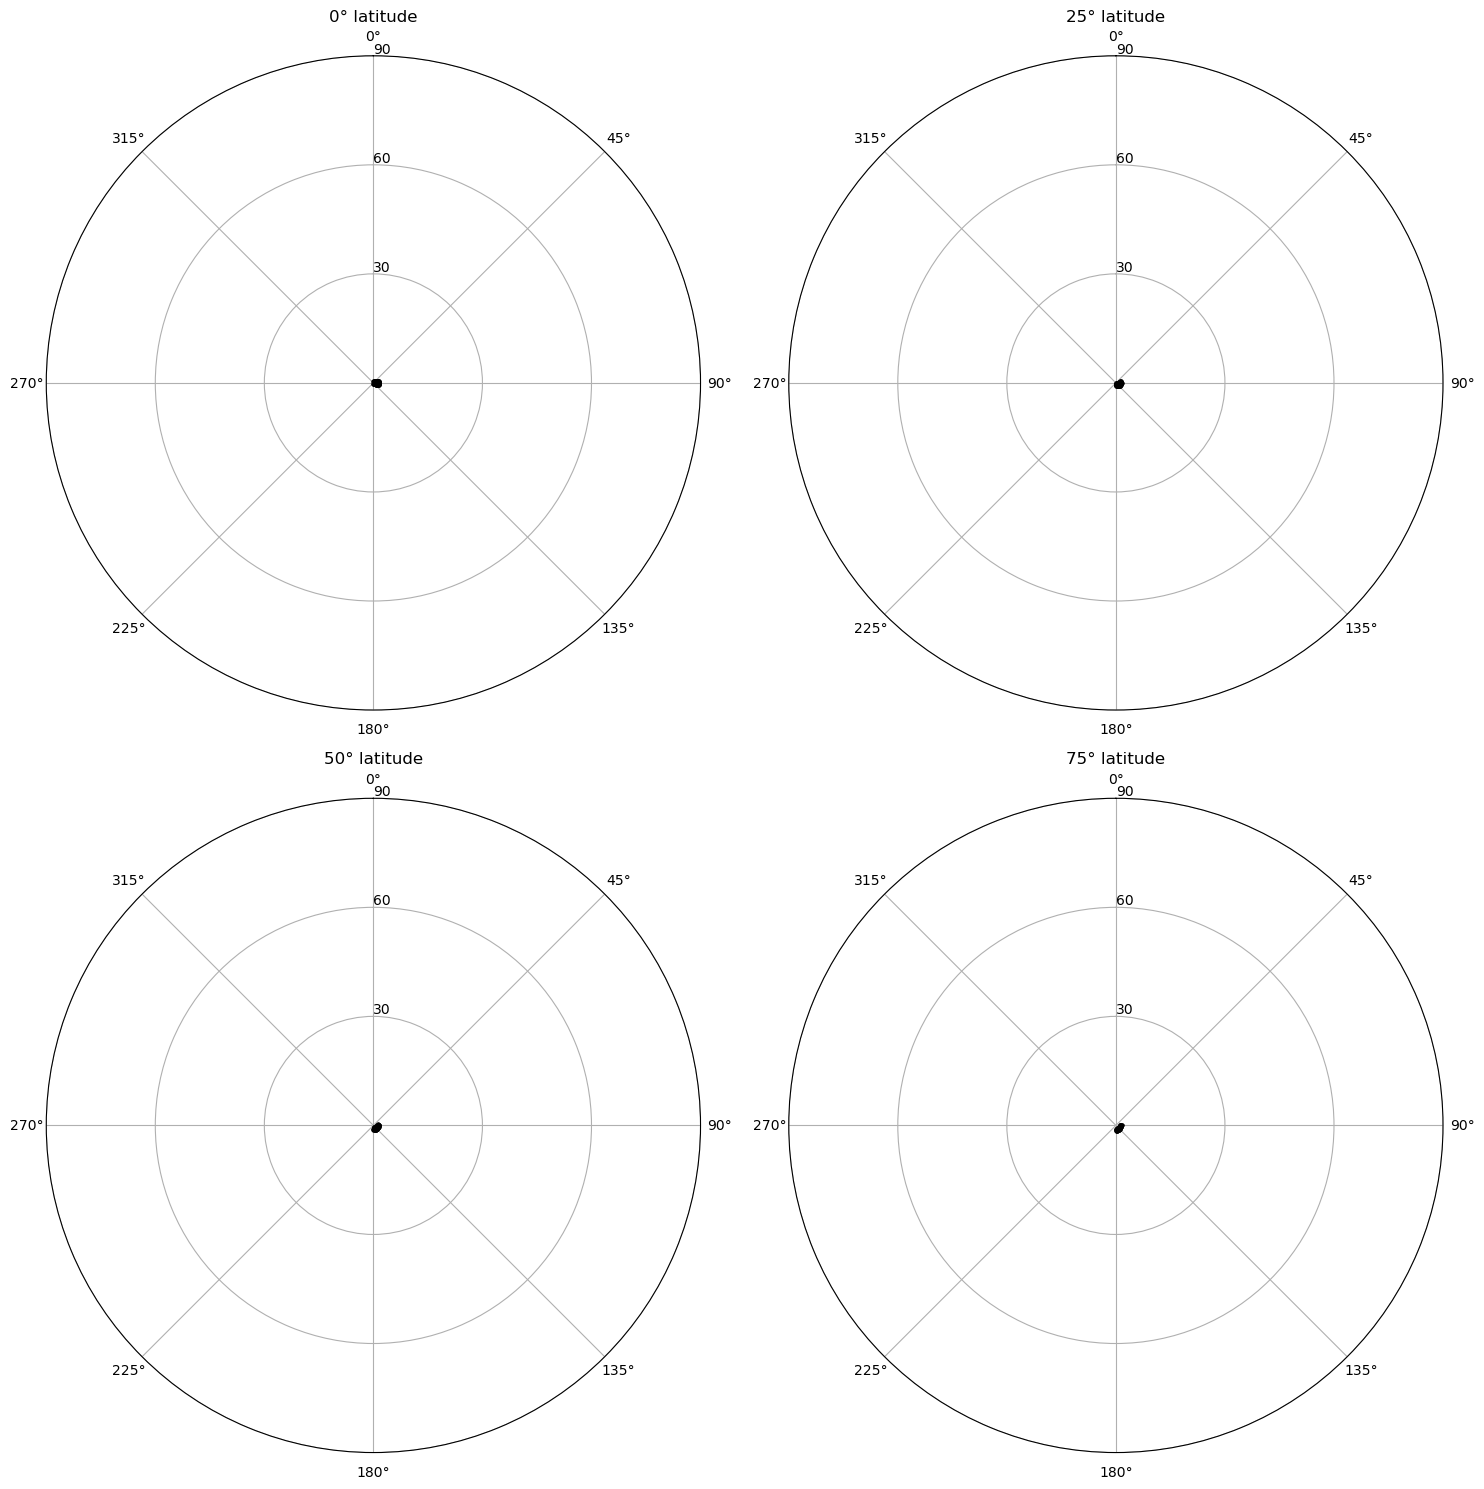

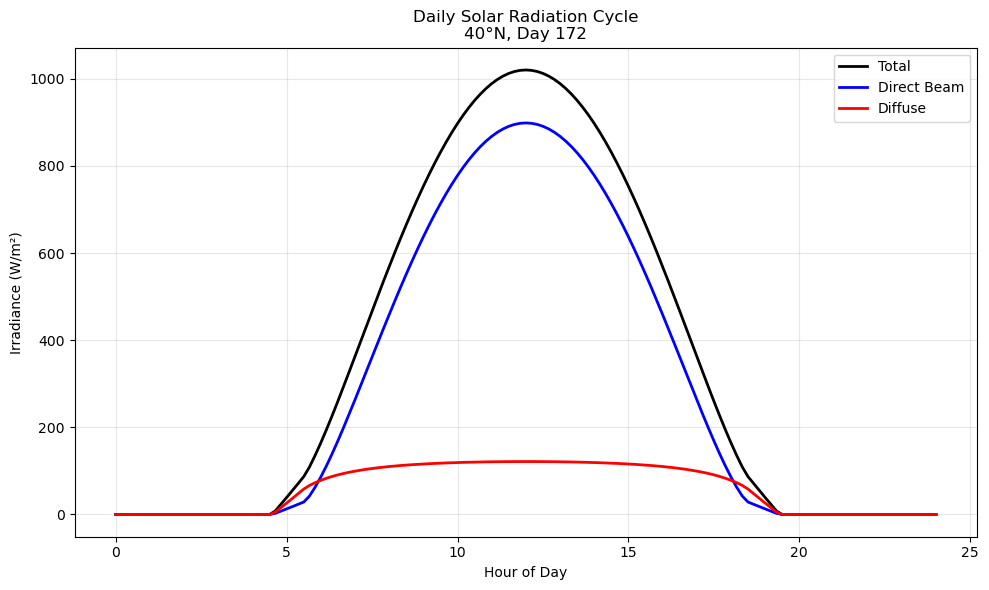

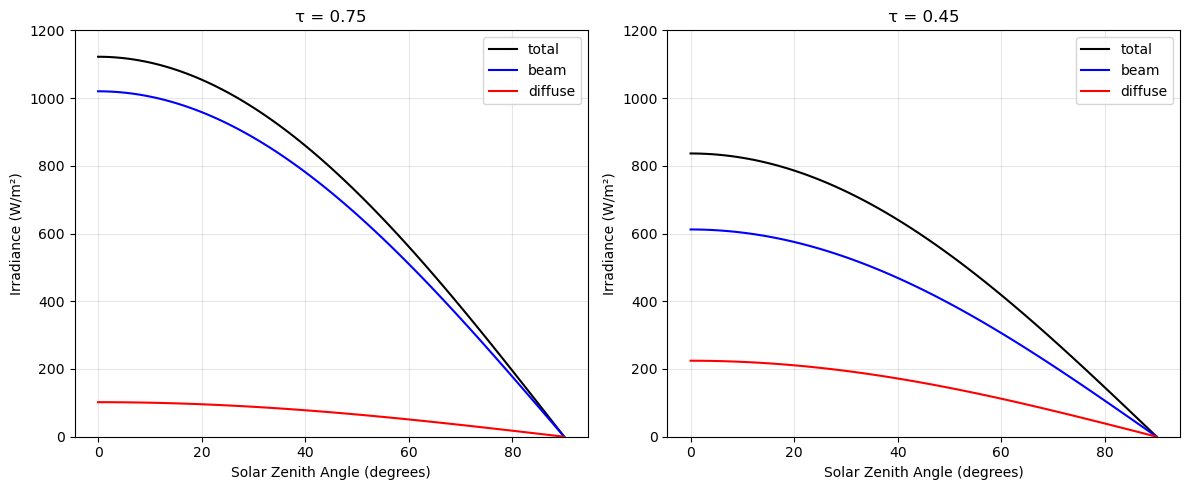

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd
from datetime import datetime, timedelta

# Import the previously defined functions
# [Previous radiation flux calculation functions would be imported here]

def plot_beam_diffuse_total(zenith_angles, tau_values=[0.75, 0.45]):
    """
    Create plots similar to Figures 11.2 and 11.3 showing beam, diffuse, and total radiation
    for different atmospheric transmittance values.
    """
    solar_constant = 1360  # W/m²
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    for idx, tau in enumerate(tau_values):
        air_mass = 1.0  # Simplified assumption for demonstration
        
        # Calculate radiation components
        beam = []
        diffuse = []
        total = []
        
        for angle in zenith_angles:
            Sp = solar_constant * tau**air_mass
            Sb = Sp * np.cos(np.radians(angle))
            Sd = 0.3 * solar_constant * (1 - tau**air_mass) * np.cos(np.radians(angle))
            St = Sb + Sd
            
            beam.append(Sb)
            diffuse.append(Sd)
            total.append(St)
        
        # Plot
        axs[idx].plot(zenith_angles, total, 'k-', label='total')
        axs[idx].plot(zenith_angles, beam, 'b-', label='beam')
        axs[idx].plot(zenith_angles, diffuse, 'r-', label='diffuse')
        
        axs[idx].set_xlabel('Solar Zenith Angle (degrees)')
        axs[idx].set_ylabel('Irradiance (W/m²)')
        axs[idx].set_title(f'τ = {tau}')
        axs[idx].grid(True, alpha=0.3)
        axs[idx].legend()
        axs[idx].set_ylim(0, 1200)
    
    plt.tight_layout()
    return fig

def plot_sun_tracks(latitudes=[0, 25, 50, 75]):
    """
    Create sun track plots similar to Figure 11.1 for different latitudes.
    """
    fig = plt.figure(figsize=(15, 15))
    gs = GridSpec(2, 2, figure=fig)
    
    # Key declination angles through the year
    declinations = [-23.5, -10, 0, 10, 23.5]
    
    for idx, lat in enumerate(latitudes):
        ax = fig.add_subplot(gs[idx//2, idx%2], projection='polar')
        
        for dec in declinations:
            # Calculate sun position throughout the day
            hours = np.linspace(6, 18, 25)  # Solar time
            zen_angles = []
            azim_angles = []
            
            for hr in hours:
                zenith = solar_zenith_angle(lat, dec, hr)
                if zenith <= 90:  # Only plot when sun is above horizon
                    azimuth = solar_azimuth_angle(lat, dec, zenith)
                    zen_angles.append(np.radians(zenith))
                    azim_angles.append(np.radians(azimuth))
            
            if zen_angles:  # Plot if we have valid points
                ax.plot(azim_angles, zen_angles, 'k-', lw=1)
                ax.plot(azim_angles, zen_angles, 'k.', markersize=4)
        
        # Configure polar plot
        ax.set_theta_zero_location('N')
        ax.set_theta_direction(-1)
        ax.set_rmax(90)
        ax.set_rticks([30, 60, 90])
        ax.set_rlabel_position(0)
        ax.grid(True)
        ax.set_title(f'{lat}° latitude')
    
    plt.tight_layout()
    return fig

def plot_daily_radiation_cycle():
    """
    Create a plot showing the daily cycle of solar radiation components.
    """
    # Create time array for a single day
    hours = np.linspace(0, 24, 145)  # 10-minute intervals
    
    # Example parameters
    latitude = 40  # degrees North
    day_of_year = 172  # June 21
    declination = solar_declination(day_of_year)
    solar_constant = 1360  # W/m²
    transmittance = 0.7
    
    # Calculate radiation components
    beam = []
    diffuse = []
    total = []
    
    for hr in hours:
        zenith = solar_zenith_angle(latitude, declination, hr)
        
        if zenith < 90:  # Sun is above horizon
            air_mass = 1/np.cos(np.radians(min(zenith, 80)))  # Limit zenith angle for air mass calc
            Sp = solar_constant * transmittance**air_mass
            Sb = Sp * np.cos(np.radians(zenith))
            Sd = 0.3 * solar_constant * (1 - transmittance**air_mass) * np.cos(np.radians(zenith))
        else:
            Sb = 0
            Sd = 0
        
        beam.append(max(0, Sb))
        diffuse.append(max(0, Sd))
        total.append(max(0, Sb + Sd))
    
    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(hours, total, 'k-', label='Total', linewidth=2)
    ax.plot(hours, beam, 'b-', label='Direct Beam', linewidth=2)
    ax.plot(hours, diffuse, 'r-', label='Diffuse', linewidth=2)
    
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Irradiance (W/m²)')
    ax.set_title(f'Daily Solar Radiation Cycle\n{latitude}°N, Day {day_of_year}')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    plt.tight_layout()
    return fig

# Generate and display all plots
zenith_angles = np.linspace(0, 90, 91)

# Figure 1: Beam, diffuse, and total radiation for clear and turbid atmospheres
fig1 = plot_beam_diffuse_total(zenith_angles)

# Figure 2: Sun tracks at different latitudes
fig2 = plot_sun_tracks()

# Figure 3: Daily radiation cycle
fig3 = plot_daily_radiation_cycle()

# Display all figures
for fig in [fig1, fig2, fig3]:
    plt.figure(fig.number)
    plt.show()

In [7]:
import numpy as np
from datetime import datetime

def calc_solar_noon(longitude, standard_meridian, equation_of_time):
    """Calculate time of solar noon.
    
    Args:
        longitude (float): Local longitude in degrees
        standard_meridian (float): Standard meridian for time zone
        equation_of_time (float): Equation of time correction in hours
        
    Returns:
        float: Time of solar noon in hours
    """
    # LC is +4 minutes per degree east of standard meridian
    LC = (longitude - standard_meridian) / 15  # Convert to hours
    return 12 - LC - equation_of_time

def solar_elevation(lat, decl, hour_angle):
    """Calculate solar elevation/zenith angles.
    
    Args:
        lat (float): Latitude in degrees
        decl (float): Solar declination in degrees
        hour_angle (float): Hour angle in degrees
        
    Returns:
        tuple: (zenith_angle, elevation_angle) in degrees
    """
    lat_rad = np.radians(lat)
    decl_rad = np.radians(decl)
    hour_rad = np.radians(hour_angle)
    
    sin_elevation = (np.sin(lat_rad) * np.sin(decl_rad) + 
                    np.cos(lat_rad) * np.cos(decl_rad) * np.cos(hour_rad))
    
    zenith_angle = np.degrees(np.arccos(sin_elevation))
    elevation_angle = 90 - zenith_angle
    
    return zenith_angle, elevation_angle

def half_day_length(lat, decl, zenith_limit=96):
    """Calculate half day length including twilight.
    
    Args:
        lat (float): Latitude in degrees
        decl (float): Solar declination in degrees
        zenith_limit (float): Zenith angle limit (96° for civil twilight)
        
    Returns:
        float: Half day length in degrees
    """
    lat_rad = np.radians(lat)
    decl_rad = np.radians(decl)
    zen_rad = np.radians(zenith_limit)
    
    cos_h = (np.cos(zen_rad) - np.sin(lat_rad) * np.sin(decl_rad)) / \
            (np.cos(lat_rad) * np.cos(decl_rad))
    
    # Ensure cos_h is within valid range for arccos
    cos_h = np.clip(cos_h, -1, 1)
    
    return np.degrees(np.arccos(cos_h))

def example_11_1():
    """
    Example 11.1: Find the sun zenith angle for Pullman, WA at 10:45 PDT on June 30. 
    Also find the time of first twilight and the daylength.
    """
    print("\nExample 11.1 Solution:")
    print("-" * 50)
    
    # Given parameters
    latitude = 46.77  # Pullman latitude
    longitude = 117.2  # Pullman longitude
    standard_meridian = 120  # Pacific Time zone
    
    # Convert 10:45 PDT to standard time
    time = 9.75  # 10:45 - 1 hour (PDT to PST)
    
    # Calculate local correction
    LC = (longitude - standard_meridian) / 15  # hours
    print(f"Longitude correction (LC) = {LC:.2f} hours")
    
    # June 30 is day 181
    # From table 11.1 or calculation
    ET = -0.06  # hours
    print(f"Equation of time (ET) = {ET:.2f} hours")
    
    # Calculate solar noon
    t0 = calc_solar_noon(longitude, standard_meridian, ET)
    print(f"Time of solar noon = {t0:.2f} hours")
    
    # Solar declination for June 30 (from table or calculation)
    declination = 23.18  # degrees
    print(f"Solar declination = {declination:.2f} degrees")
    
    # Calculate hour angle
    hour_angle = 15 * (time - t0)  # 15 degrees per hour
    
    # Calculate zenith angle
    zenith, elevation = solar_elevation(latitude, declination, hour_angle)
    print(f"Solar zenith angle = {zenith:.1f} degrees")
    
    # Calculate half daylength including twilight
    h_twilight = half_day_length(latitude, declination, 96)
    print(f"Half daylength (including twilight) = {h_twilight:.1f} degrees = {h_twilight/15:.2f} hours")
    
    # Calculate time of first twilight
    first_twilight = t0 - h_twilight/15
    print(f"Time of first twilight = {first_twilight:.2f} hrs (solar time)")
    
    # Calculate daylength
    daylength = 2 * h_twilight/15
    print(f"Daylength = {daylength:.1f} hours")
    
    # Convert twilight time to PDT
    twilight_PDT = first_twilight + LC + ET + 1  # Add 1 for PDT
    print(f"First twilight in PDT = {twilight_PDT:.2f} hrs = {int(twilight_PDT)}:{int((twilight_PDT%1)*60):02d}")

def example_11_2():
    """
    Example 11.2: Find all components of the solar radiation over a grass surface 
    on a clear day when the solar zenith angle is 30° and the altitude is 800 m.
    """
    print("\nExample 11.2 Solution:")
    print("-" * 50)
    
    # Given parameters
    zenith_angle = 30  # degrees
    altitude = 800  # meters
    solar_constant = 1360  # W/m²
    transmittance = 0.7  # typical clear day value
    
    # Calculate atmospheric pressure at altitude
    pressure = 101 * np.exp(-altitude/8200)  # kPa
    print(f"Atmospheric pressure at {altitude}m = {pressure:.1f} kPa")
    
    # Calculate air mass number
    air_mass = (pressure/101.3) / np.cos(np.radians(zenith_angle))
    print(f"Air mass number = {air_mass:.2f}")
    
    # Calculate direct beam perpendicular to solar beam (Sp)
    tau_m = transmittance**air_mass
    print(f"τᵐ = {tau_m:.3f}")
    
    Sp = solar_constant * tau_m
    print(f"Direct beam perpendicular (Sp) = {Sp:.0f} W/m²")
    
    # Calculate diffuse radiation (Sd)
    cos_zenith = np.cos(np.radians(zenith_angle))
    Sd = 0.3 * solar_constant * (1 - tau_m) * cos_zenith
    print(f"Diffuse radiation (Sd) = {Sd:.0f} W/m²")
    
    # Calculate direct beam on horizontal surface (Sb)
    Sb = Sp * cos_zenith
    print(f"Direct beam on horizontal surface (Sb) = {Sb:.0f} W/m²")
    
    # Calculate total radiation (St)
    St = Sb + Sd
    print(f"Total radiation (St) = {St:.0f} W/m²")
    
    # Calculate reflected radiation using grass albedo
    grass_albedo = 0.26  # from Table 11.2
    Sr = grass_albedo * St
    print(f"Reflected radiation (Sr) = {Sr:.0f} W/m²")

# Run the examples
example_11_1()
example_11_2()


Example 11.1 Solution:
--------------------------------------------------
Longitude correction (LC) = -0.19 hours
Equation of time (ET) = -0.06 hours
Time of solar noon = 12.25 hours
Solar declination = 23.18 degrees
Solar zenith angle = 38.1 degrees
Half daylength (including twilight) = 128.4 degrees = 8.56 hours
Time of first twilight = 3.68 hrs (solar time)
Daylength = 17.1 hours
First twilight in PDT = 4.44 hrs = 4:26

Example 11.2 Solution:
--------------------------------------------------
Atmospheric pressure at 800m = 91.6 kPa
Air mass number = 1.04
τᵐ = 0.689
Direct beam perpendicular (Sp) = 937 W/m²
Diffuse radiation (Sd) = 110 W/m²
Direct beam on horizontal surface (Sb) = 812 W/m²
Total radiation (St) = 921 W/m²
Reflected radiation (Sr) = 240 W/m²


In [8]:
import numpy as np

def stefan_boltzmann_law(T_kelvin, emissivity=0.97):
    """Calculate thermal radiation using Stefan-Boltzmann law.
    
    Args:
        T_kelvin (float): Temperature in Kelvin
        emissivity (float): Surface emissivity
        
    Returns:
        float: Thermal radiation in W/m²
    """
    sigma = 5.67e-8  # Stefan-Boltzmann constant
    return emissivity * sigma * T_kelvin**4

def sky_emissivity(T_air_C, clear_sky=True):
    """Estimate sky emissivity.
    
    Args:
        T_air_C (float): Air temperature in Celsius
        clear_sky (bool): True for clear sky, False for overcast
        
    Returns:
        float: Sky emissivity
    """
    if clear_sky:
        return 0.85  # Typical clear sky value
    else:
        return 1.0  # Overcast sky approaches black body

def problem_11_1():
    """
    Problem 11.1: Compare Rabs for an animal under a clear night sky 
    and a completely overcast cloudy night sky. 
    Assume Ta = Tg = 20°C.
    """
    print("\nProblem 11.1 Solution:")
    print("-" * 50)
    
    # Convert temperatures
    T_C = 20
    T_K = T_C + 273.15
    
    # Animal parameters (assuming typical values)
    animal_emissivity = 0.97
    animal_view_factor_sky = 0.5  # Half view to sky
    animal_view_factor_ground = 0.5  # Half view to ground
    
    # Calculate ground thermal radiation
    L_ground = stefan_boltzmann_law(T_K, emissivity=0.97)
    print(f"Ground thermal radiation = {L_ground:.0f} W/m²")
    
    # Calculate clear sky thermal radiation
    sky_emis_clear = sky_emissivity(T_C, clear_sky=True)
    L_sky_clear = stefan_boltzmann_law(T_K, emissivity=sky_emis_clear)
    print(f"Clear sky thermal radiation = {L_sky_clear:.0f} W/m²")
    
    # Calculate overcast sky thermal radiation
    sky_emis_overcast = sky_emissivity(T_C, clear_sky=False)
    L_sky_overcast = stefan_boltzmann_law(T_K, emissivity=sky_emis_overcast)
    print(f"Overcast sky thermal radiation = {L_sky_overcast:.0f} W/m²")
    
    # Calculate absorbed radiation for clear sky
    Rabs_clear = animal_emissivity * (
        animal_view_factor_sky * L_sky_clear +
        animal_view_factor_ground * L_ground
    )
    print(f"\nAbsorbed radiation under clear sky = {Rabs_clear:.0f} W/m²")
    
    # Calculate absorbed radiation for overcast sky
    Rabs_overcast = animal_emissivity * (
        animal_view_factor_sky * L_sky_overcast +
        animal_view_factor_ground * L_ground
    )
    print(f"Absorbed radiation under overcast sky = {Rabs_overcast:.0f} W/m²")
    
    # Calculate difference
    difference = Rabs_overcast - Rabs_clear
    print(f"\nDifference (overcast - clear) = {difference:.0f} W/m²")
    print(f"Percent increase under overcast conditions = {(difference/Rabs_clear*100):.1f}%")

def problem_11_2():
    """
    Problem 11.2: Compute Rabs for your hand suspended horizontally over a dry soil surface 
    on a clear day. Assume:
    - Ta = 25°C
    - Tg = 45°C
    - ψ = 40°
    - αs = 0.65
    """
    print("\nProblem 11.2 Solution:")
    print("-" * 50)
    
    # Given parameters
    zenith_angle = 40  # degrees
    T_air_C = 25
    T_ground_C = 45
    alpha_s = 0.65  # solar absorptivity of hand
    
    # Convert temperatures to Kelvin
    T_air_K = T_air_C + 273.15
    T_ground_K = T_ground_C + 273.15
    
    # Solar radiation parameters
    solar_constant = 1360  # W/m²
    transmittance = 0.7  # clear day
    air_mass = 1/np.cos(np.radians(min(zenith_angle, 80)))
    
    # Calculate solar components
    # Direct beam perpendicular to solar beam
    Sp = solar_constant * transmittance**air_mass
    print(f"Direct beam radiation (Sp) = {Sp:.0f} W/m²")
    
    # Direct beam on horizontal surface
    cos_zenith = np.cos(np.radians(zenith_angle))
    Sb = Sp * cos_zenith
    print(f"Direct beam on horizontal surface (Sb) = {Sb:.0f} W/m²")
    
    # Diffuse radiation
    Sd = 0.3 * solar_constant * (1 - transmittance**air_mass) * cos_zenith
    print(f"Diffuse radiation (Sd) = {Sd:.0f} W/m²")
    
    # Ground reflected radiation
    soil_albedo = 0.13  # dry dark soil from Table 11.2
    St = Sb + Sd
    Sr = soil_albedo * St
    print(f"Reflected radiation (Sr) = {Sr:.0f} W/m²")
    
    # Thermal radiation components
    # From ground
    L_ground = stefan_boltzmann_law(T_ground_K)
    print(f"Ground thermal radiation = {L_ground:.0f} W/m²")
    
    # From sky
    sky_emis = sky_emissivity(T_air_C, clear_sky=True)
    L_sky = stefan_boltzmann_law(T_air_K, emissivity=sky_emis)
    print(f"Sky thermal radiation = {L_sky:.0f} W/m²")
    
    # Calculate total absorbed radiation
    # View factors for horizontal hand
    F_p = 0.5 * cos_zenith  # For beam radiation (one side only)
    F_d = F_r = F_a = F_g = 0.5  # For diffuse components
    
    # Solar component
    R_abs_solar = alpha_s * (F_p * Sp + F_d * Sd + F_r * Sr)
    
    # Thermal component
    thermal_absorptivity = 0.97  # typical for skin
    R_abs_thermal = thermal_absorptivity * (F_a * L_sky + F_g * L_ground)
    
    # Total absorbed radiation
    R_abs_total = R_abs_solar + R_abs_thermal
    print(f"\nTotal absorbed radiation = {R_abs_total:.0f} W/m²")
    
    # Estimate hand area and total power
    hand_length = 0.18  # meters (approximate)
    hand_width = 0.08   # meters (approximate)
    hand_area = 2 * hand_length * hand_width  # both sides
    total_power = R_abs_total * hand_area
    print(f"Approximate hand area = {hand_area*1000:.0f} cm²")
    print(f"Total absorbed power = {total_power:.1f} W")

# Run the solutions
problem_11_1()
problem_11_2()


Problem 11.1 Solution:
--------------------------------------------------
Ground thermal radiation = 406 W/m²
Clear sky thermal radiation = 356 W/m²
Overcast sky thermal radiation = 419 W/m²

Absorbed radiation under clear sky = 370 W/m²
Absorbed radiation under overcast sky = 400 W/m²

Difference (overcast - clear) = 30 W/m²
Percent increase under overcast conditions = 8.2%

Problem 11.2 Solution:
--------------------------------------------------
Direct beam radiation (Sp) = 854 W/m²
Direct beam on horizontal surface (Sb) = 654 W/m²
Diffuse radiation (Sd) = 116 W/m²
Reflected radiation (Sr) = 100 W/m²
Ground thermal radiation = 563 W/m²
Sky thermal radiation = 381 W/m²

Total absorbed radiation = 741 W/m²
Approximate hand area = 29 cm²
Total absorbed power = 21.3 W
